In [1]:
#TASK-1

In [2]:
#DATA PREPROCESSING

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name=1)
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [14]:
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
#Set ID as Index Column
df.set_index('ID',inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID           
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3999 rows x 11 columns]

In [57]:
#Explorartory Data Analysis(EDA)

In [58]:
df.describe().T
print('Unique cc1_miles:', df.cc1_miles.unique())
print('Unique cc2_miles:', df.cc2_miles.unique())
print('Unique cc3_miles:', df.cc3_miles.unique())

Unique cc1_miles: [1 4 3 2 5]
Unique cc2_miles: [1]
Unique cc3_miles: [1]


In [16]:
df = df.drop_duplicates()
print("Duplicates after removal:", df.duplicated().sum())

Duplicates after removal: 0


In [17]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64


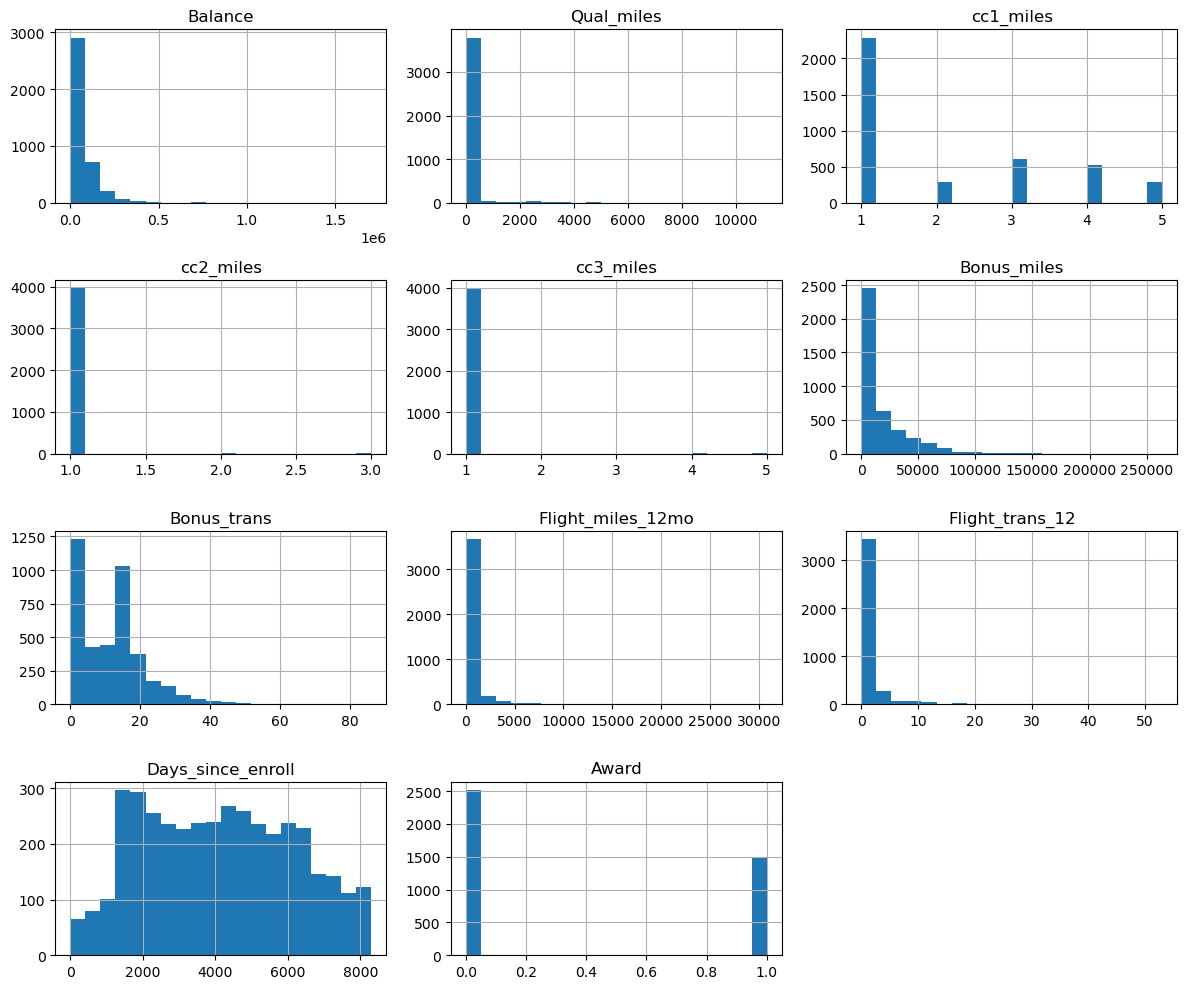

In [18]:
# Histograms
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


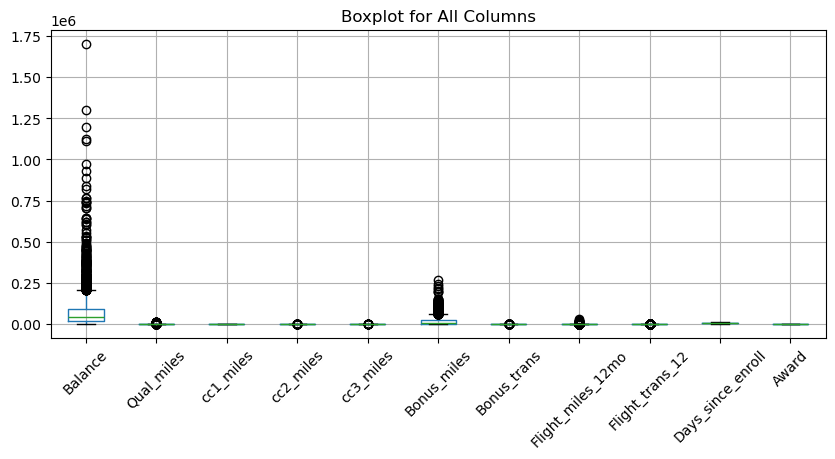

In [19]:
# Boxplot
plt.figure(figsize=(10, 4))
df.boxplot()
plt.title('Boxplot for All Columns')
plt.xticks(rotation=45)
plt.show()


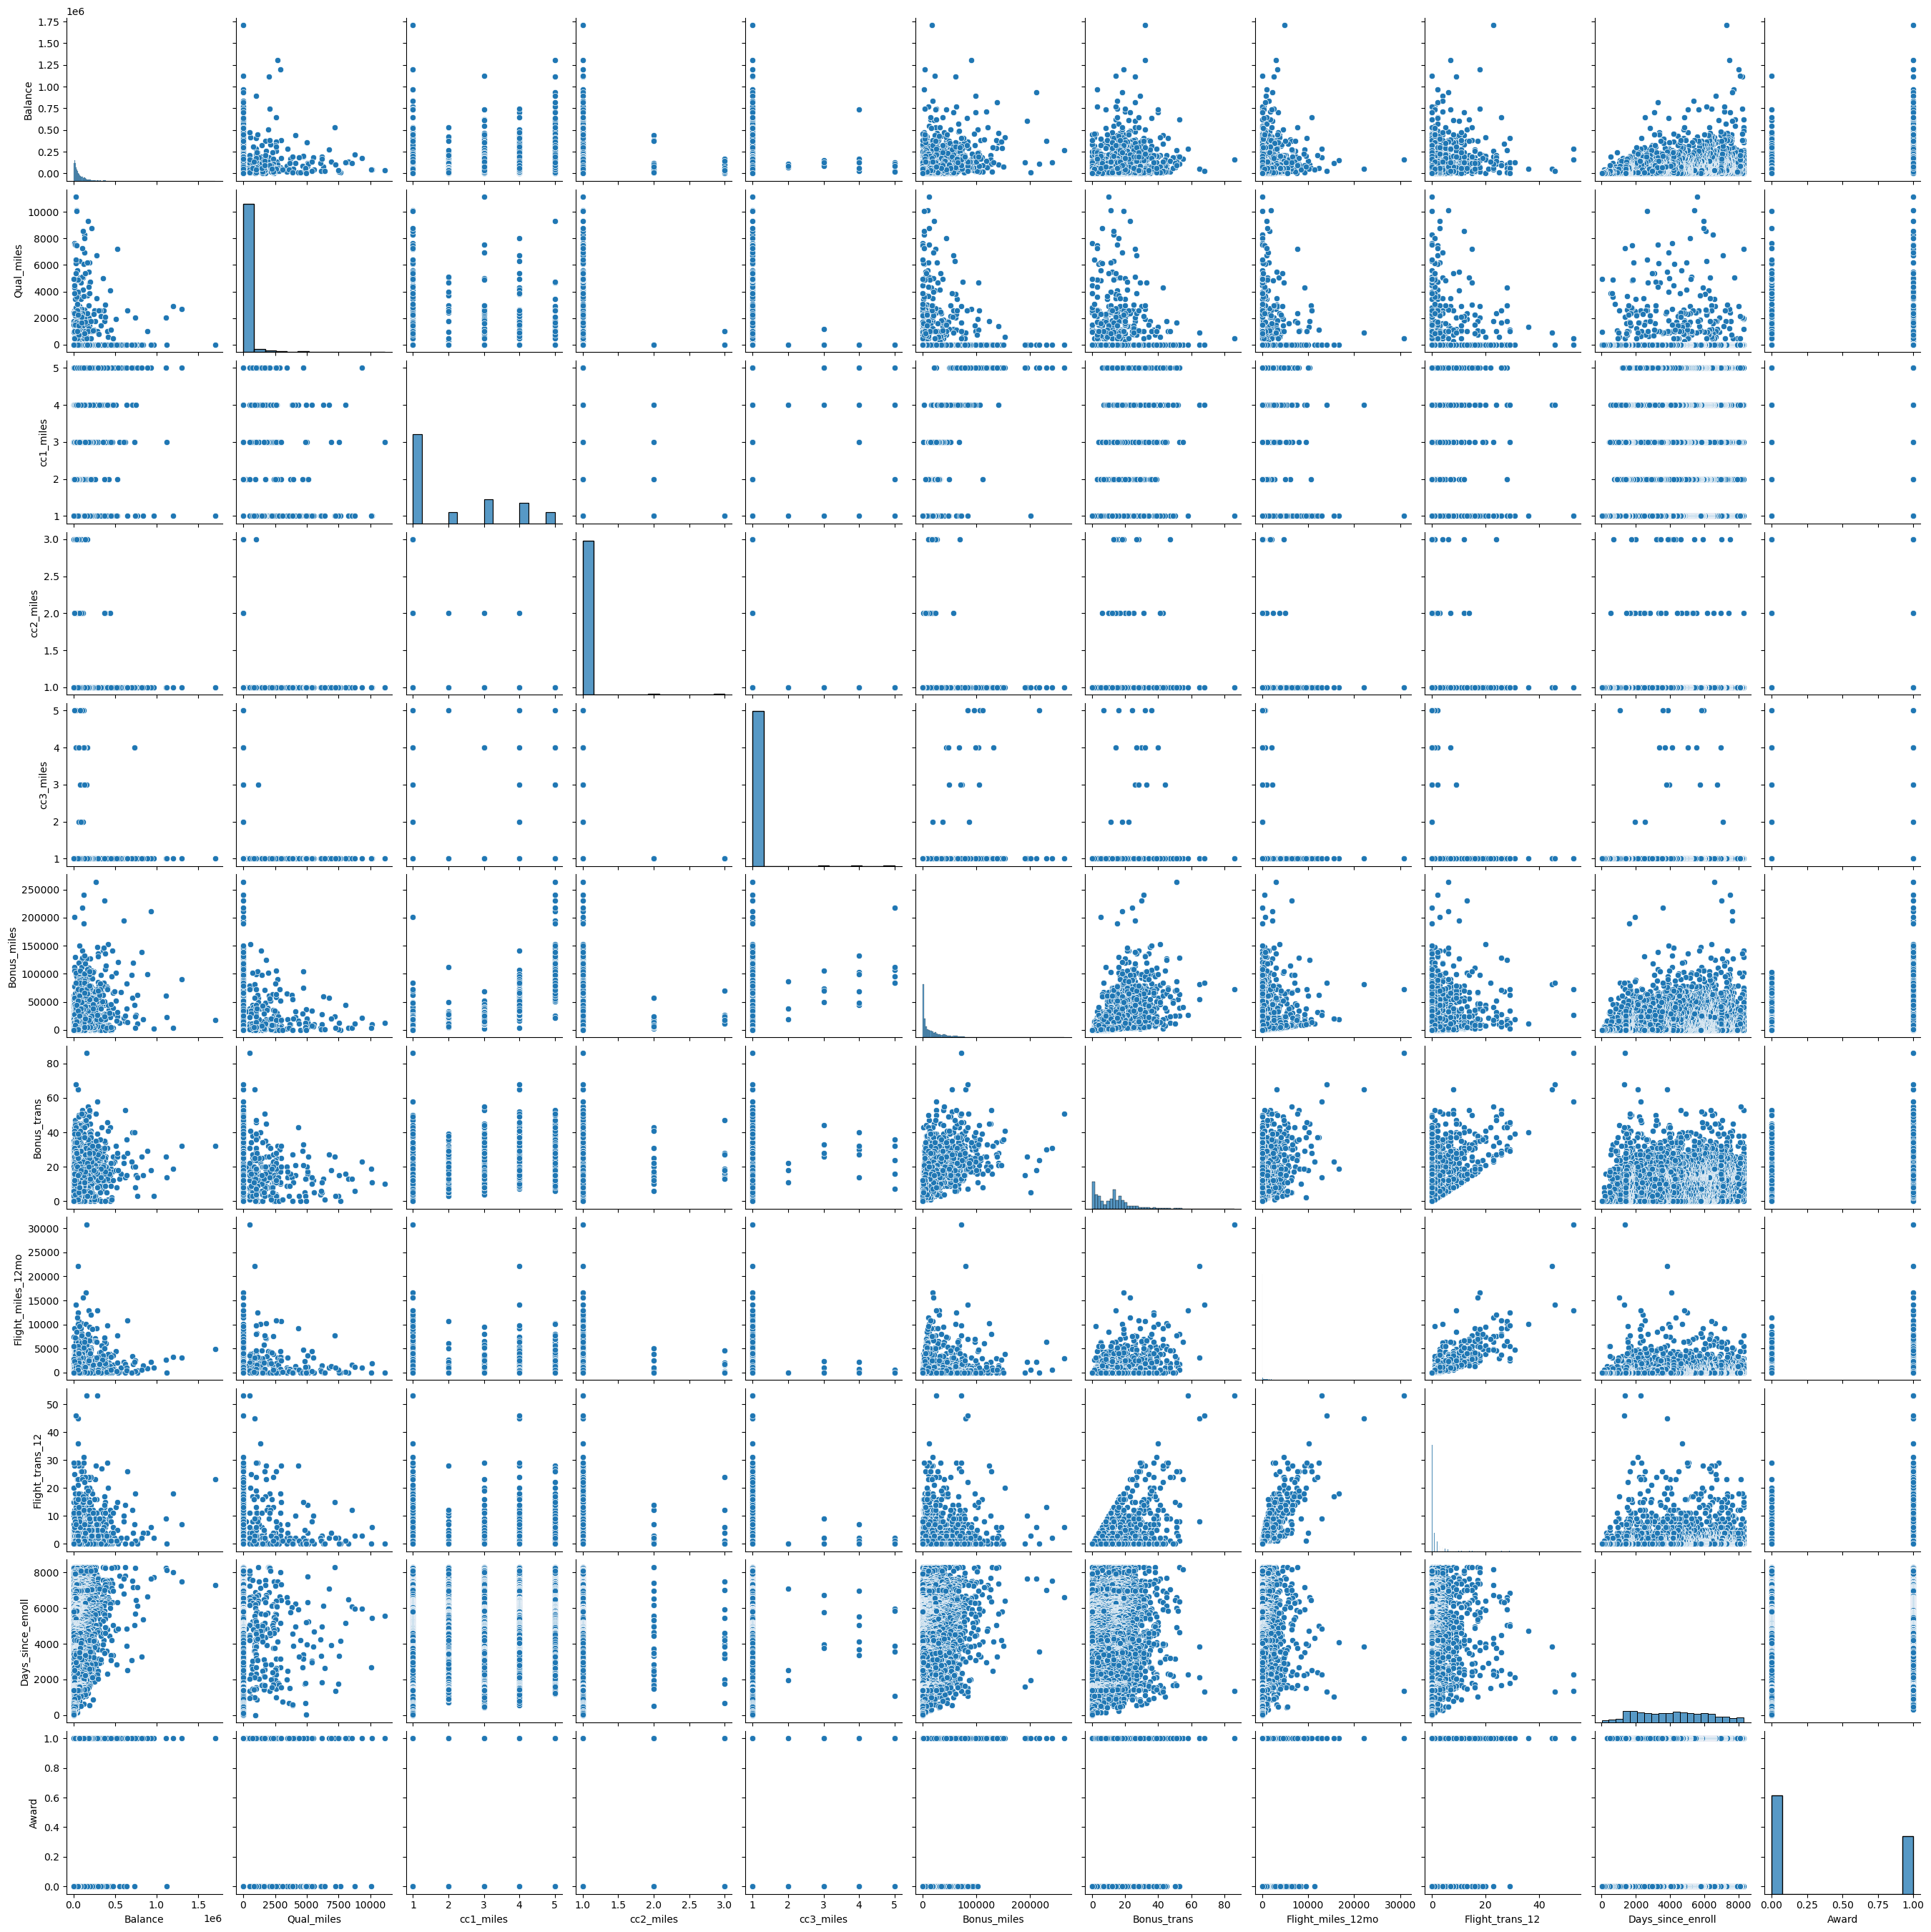

In [24]:
# Pairplot
sns.pairplot(df)
plt.show()

In [25]:
df = df.copy()

In [27]:
for col in df.columns:
    if col != 'Award':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_cap = Q1 - 1.5 * IQR
        upper_cap = Q3 + 1.5 * IQR
        df.loc[df[col] < lower_cap, col] = lower_cap
        df.loc[df[col] > upper_cap, col] = upper_cap
        plt.figure(figsize=(14, 8))
df.boxplot()
plt.title('Boxplot for All Columns after Capping')
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

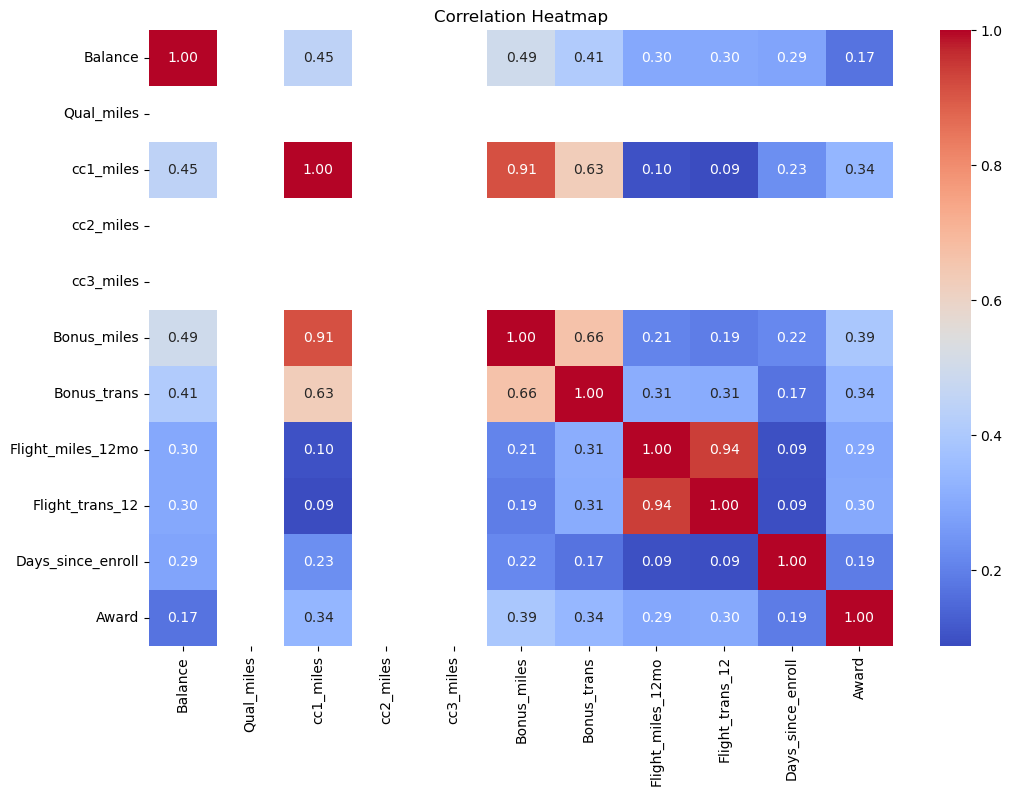

In [28]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

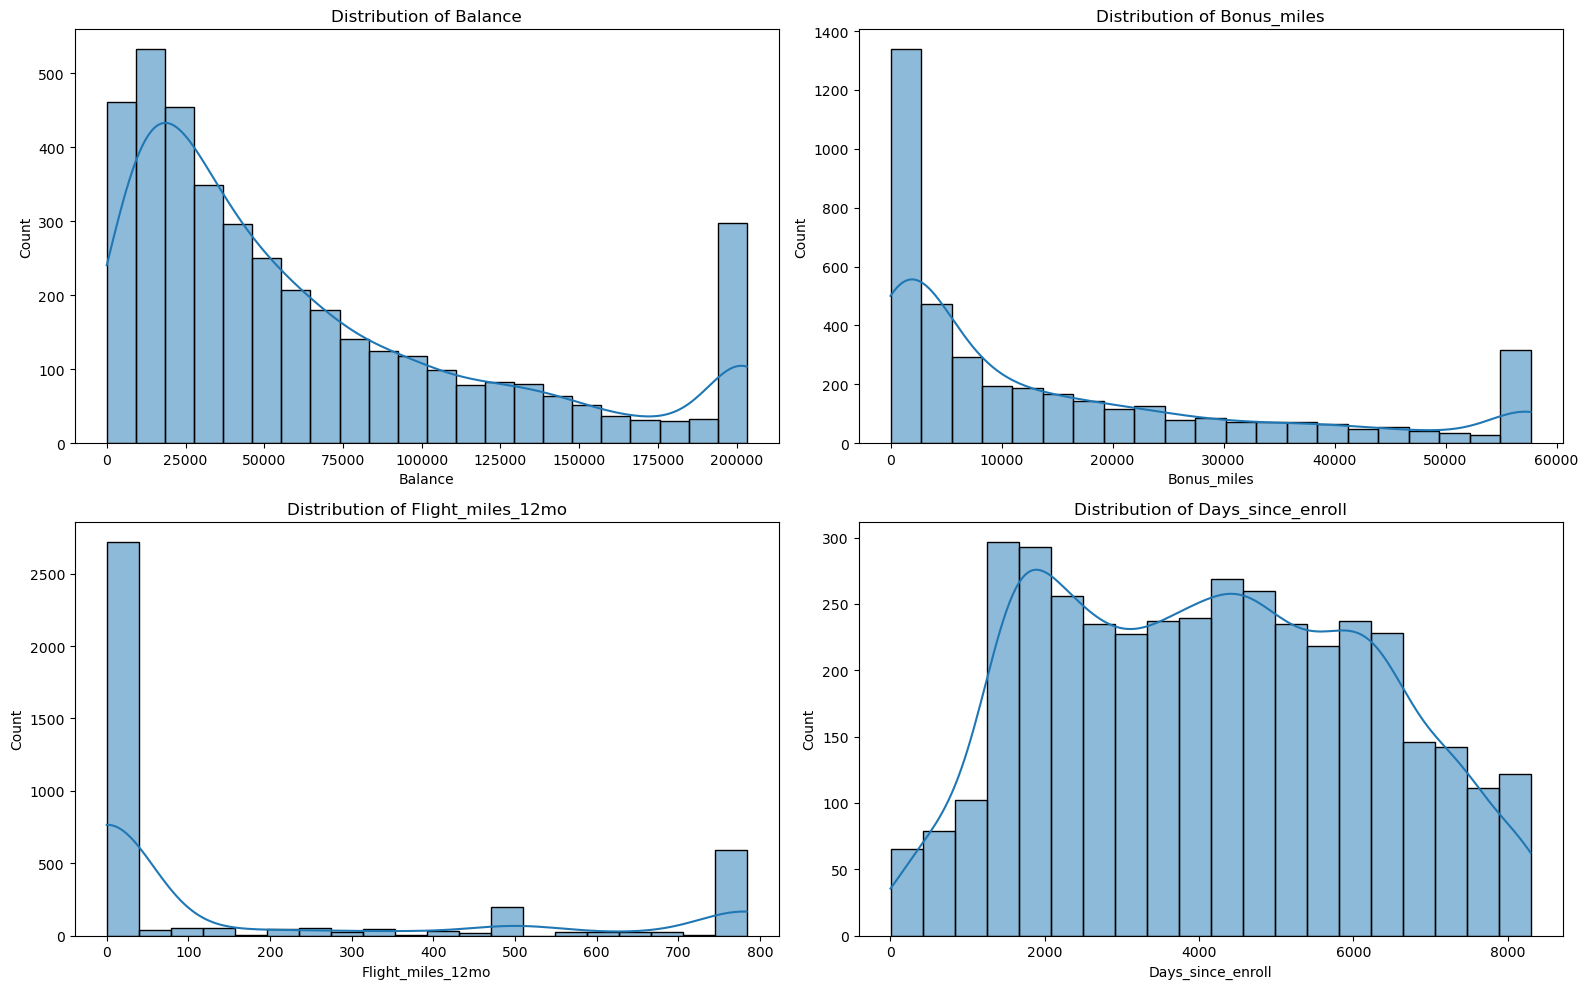

In [29]:
features = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

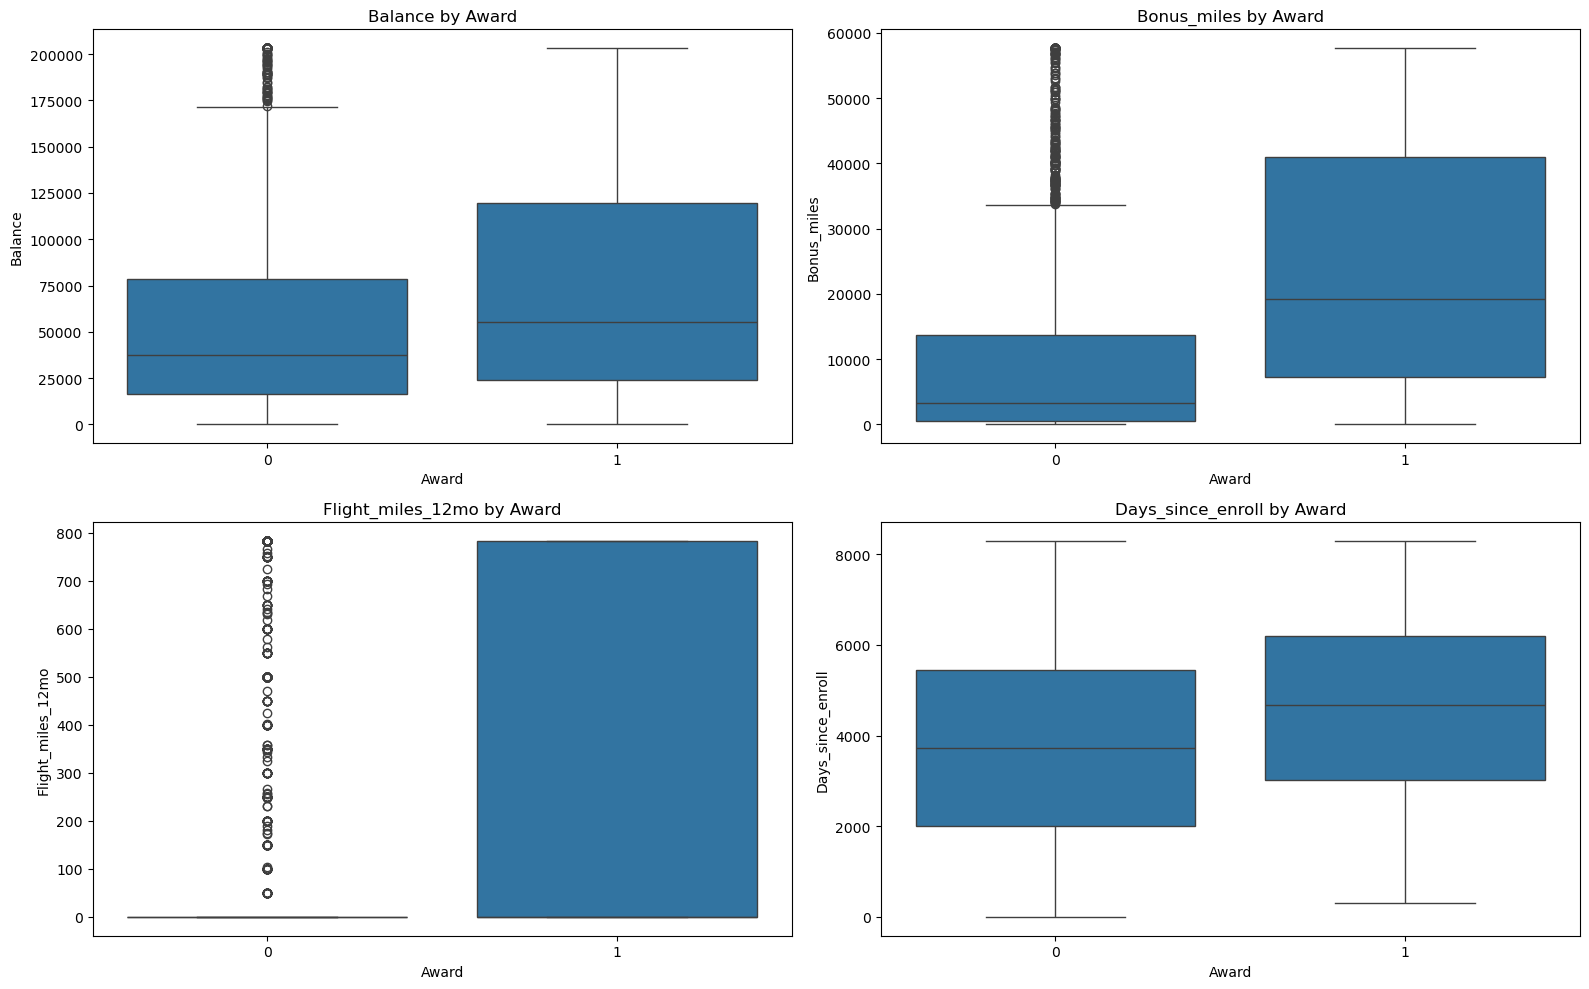

In [30]:
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Award', y=feature, data=df)
    plt.title(f'{feature} by Award')
plt.tight_layout()
plt.show()

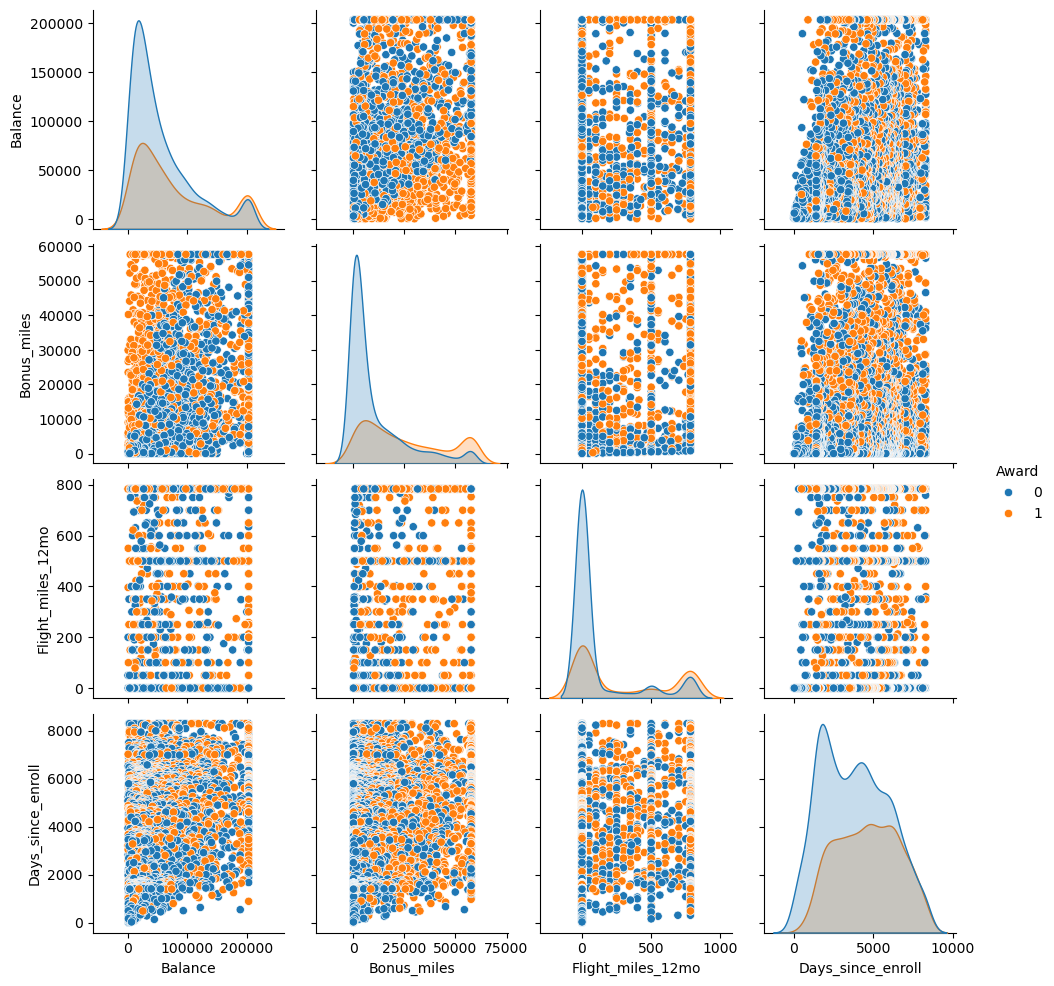

In [31]:
sns.pairplot(df[features + ['Award']], hue='Award')
plt.show()

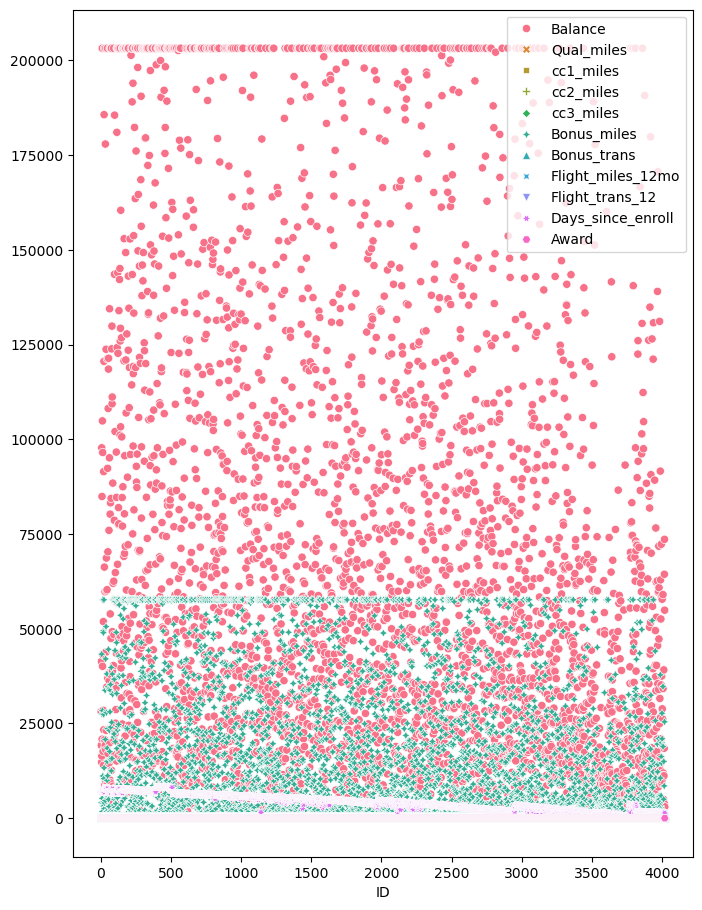

In [32]:
plt.figure(figsize=(8,11))
sns.scatterplot(data=df)
plt.show()

In [ ]:
# Implementing Clustering Algorithms

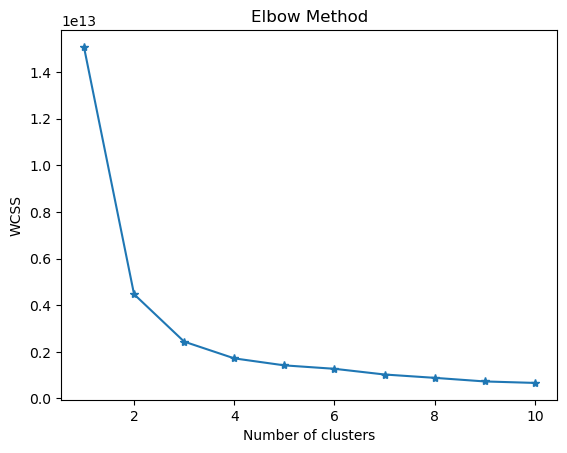

In [35]:
#cluster implementatio# Ensure features exist
features = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']
X = df[features].copy()

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)


# KMeans Clustering
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Elbow plot
plt.plot(range(1, 11), wcss, marker='*')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [36]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
X['Km_cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 4))
scatter = plt.scatter(X['Balance'], X['Days_since_enroll'], c=X['Km_cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Balance')
plt.ylabel('Days_since_enroll')
plt.title('KMeans Clusters: Balance vs Days_since_enroll')
plt.colorbar(scatter, label='Cluster')
plt.show()

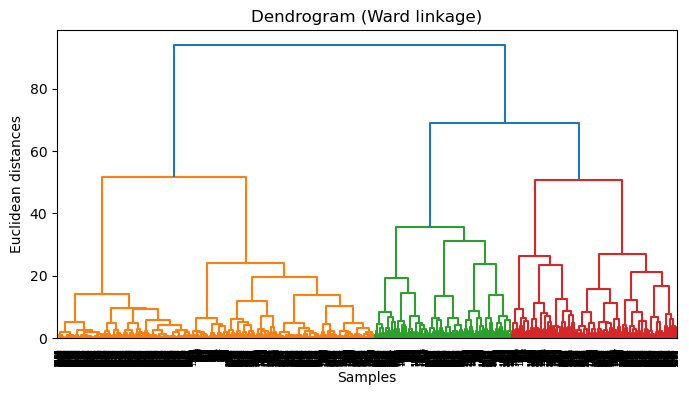

In [37]:
# Hierarchical Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    plt.figure(figsize=(8, 4))
    dendrogram = sch.dendrogram(sch.linkage(X_scaled, method=method))
    plt.title(f'Dendrogram ({method.capitalize()} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean distances')
    plt.show()

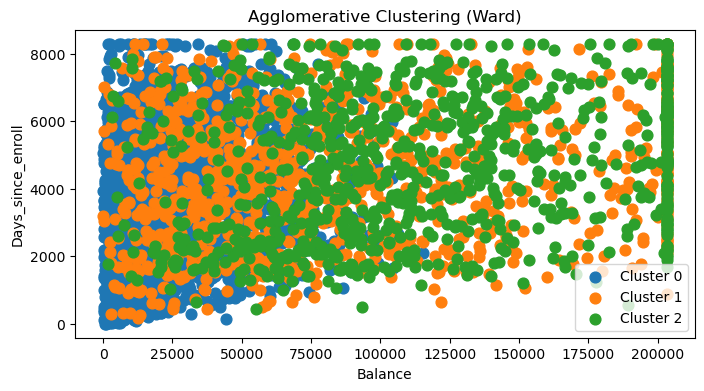

In [38]:
for method in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=method)
    df[f'Hier_{method}_cluster'] = hierarchical.fit_predict(X_scaled)

# Plot Hierarchical clusters (using 'ward' as example)
plt.figure(figsize=(8, 4))
for cluster in np.unique(df['Hier_ward_cluster']):
    plt.scatter(
        X['Balance'][df['Hier_ward_cluster']==cluster],
        X['Days_since_enroll'][df['Hier_ward_cluster']==cluster],
        s=60, label=f'Cluster {cluster}'
    )
plt.xlabel('Balance')
plt.ylabel('Days_since_enroll')
plt.title('Agglomerative Clustering (Ward)')
plt.legend()
plt.show()

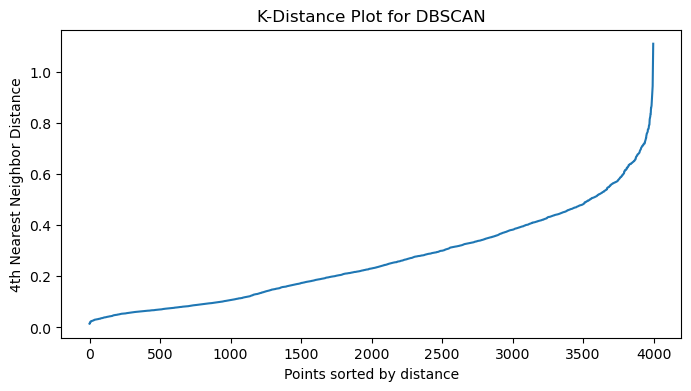

In [39]:
# DBSCAN Clustering

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-Distance Plot for DBSCAN")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

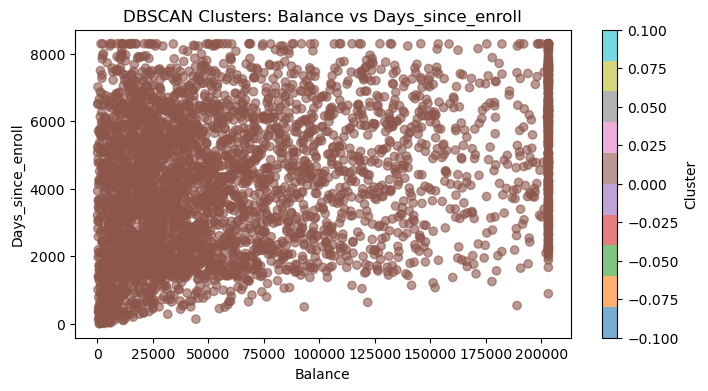

In [40]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
X['DBSCAN_cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    X['Balance'],
    X['Days_since_enroll'],
    c=X['DBSCAN_cluster'],
    cmap='tab10',
    alpha=0.6
)
plt.xlabel('Balance')
plt.ylabel('Days_since_enroll')
plt.title('DBSCAN Clusters: Balance vs Days_since_enroll')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [49]:
# Cluster Analysis and Interpretation

print("KMeans Cluster Centers (mean values):")
print(df.groupby('Km_cluster')[features + ['Award']].mean())

for method in linkage_methods:
    print(f"\nAgglomerative Clustering ({method}) Cluster Centers (mean values):")
    print(df.groupby(f'Hier_{method}_cluster')[features + ['Award']].mean())

print("\nDBSCAN Cluster Centers (mean values):")
print(df.groupby('DBSCAN_cluster')[features + ['Award']].mean())

KMeans Cluster Centers (mean values):
                  Balance   Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
Km_cluster                                                                      
0           178421.226055  31442.195617         329.978896        5180.240260   
1            23022.356291   7421.503918         113.789625        3700.155408   
2            83218.114593  22790.132722         227.932184        4383.743957   

               Award  
Km_cluster            
0           0.535714  
1           0.303311  
2           0.415398  

Agglomerative Clustering (ward) Cluster Centers (mean values):
                         Balance   Bonus_miles  Flight_miles_12mo  \
Hier_ward_cluster                                                   
0                   63306.870179  18309.928707         200.733976   
1                  173432.949777  32472.918713         321.755208   
2                   14756.131987   4110.637710          87.427609   

                   Days_since_e

In [50]:
print("KMeans Cluster Centers (mean values):")
print(df.groupby('Km_cluster')[features + ['Award']].mean())

for method in linkage_methods:
    print(f"\nAgglomerative Clustering ({method}) Cluster Centers (mean values):")
    print(df.groupby(f'Hier_{method}_cluster')[features + ['Award']].mean())

print("\nDBSCAN Cluster Centers (mean values):")
print(df.groupby('DBSCAN_cluster')[features + ['Award']].mean())


KMeans Cluster Centers (mean values):
                  Balance   Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
Km_cluster                                                                      
0           178421.226055  31442.195617         329.978896        5180.240260   
1            23022.356291   7421.503918         113.789625        3700.155408   
2            83218.114593  22790.132722         227.932184        4383.743957   

               Award  
Km_cluster            
0           0.535714  
1           0.303311  
2           0.415398  

Agglomerative Clustering (ward) Cluster Centers (mean values):
                         Balance   Bonus_miles  Flight_miles_12mo  \
Hier_ward_cluster                                                   
0                   63306.870179  18309.928707         200.733976   
1                  173432.949777  32472.918713         321.755208   
2                   14756.131987   4110.637710          87.427609   

                   Days_since_e

In [61]:
# Evaluation and Performance Metrics

In [62]:
kmeans_silhouette = silhouette_score(X[features], X['Km_cluster'])
print(f"Silhouette Score for KMeans: {kmeans_silhouette:.3f}")

# DBSCAN (exclude noise points)
dbscan_mask = X['DBSCAN_cluster'] != -1
if dbscan_mask.sum() > 1 and len(set(X.loc[dbscan_mask, 'DBSCAN_cluster'])) > 1:
    dbscan_silhouette = silhouette_score(X.loc[dbscan_mask, features], X.loc[dbscan_mask, 'DBSCAN_cluster'])
    print(f"Silhouette Score for DBSCAN (excluding noise): {dbscan_silhouette:.3f}")
else:
    print("DBSCAN did not find enough clusters for silhouette score calculation.")

Silhouette Score for KMeans: 0.542
DBSCAN did not find enough clusters for silhouette score calculation.


In [63]:
# Visualization

Text(0, 0.5, 'Days_since_enroll')

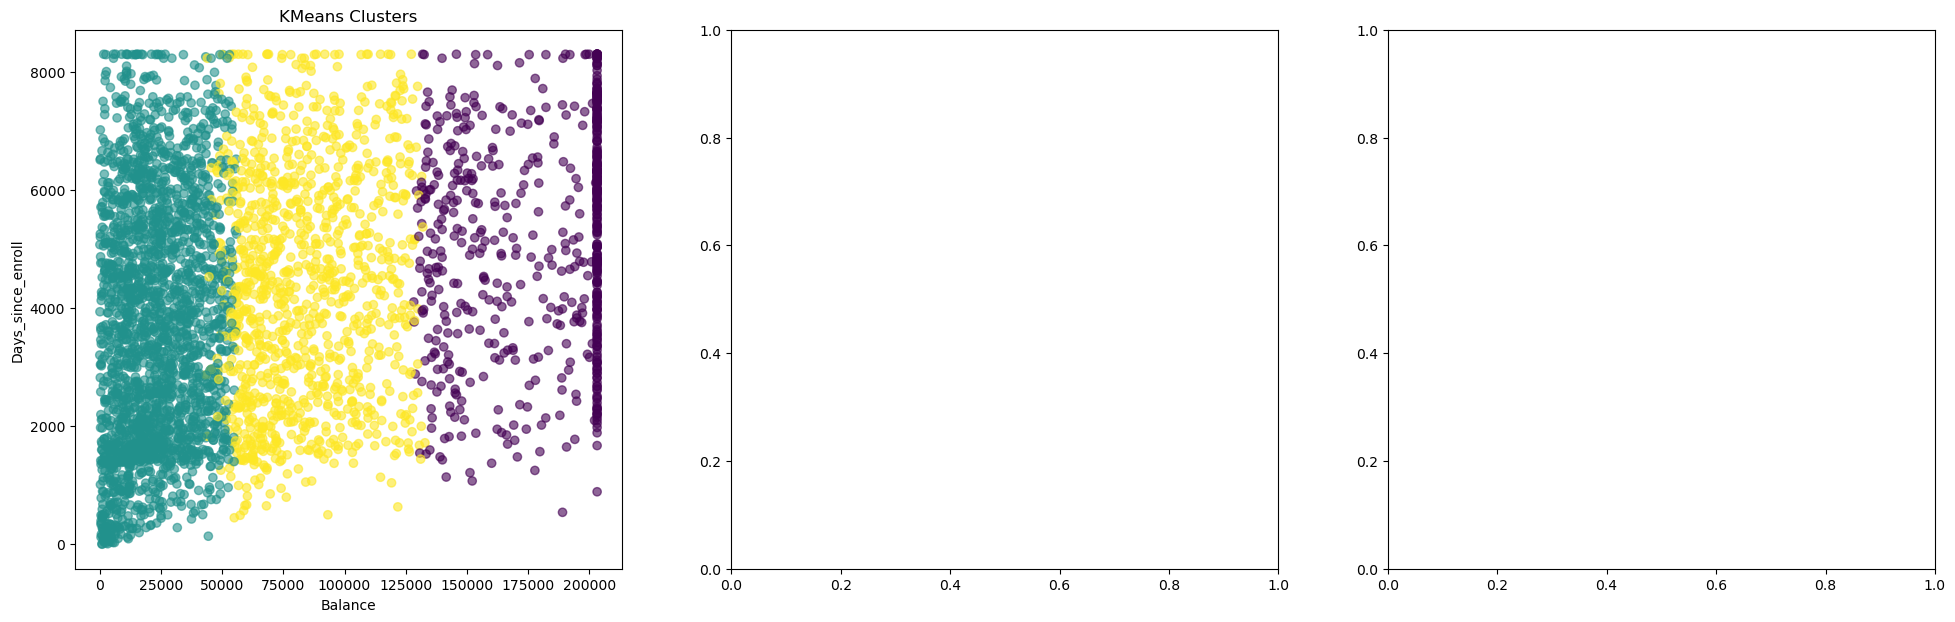

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# KMeans
axes[0].scatter(X['Balance'], X['Days_since_enroll'], c=X['Km_cluster'], cmap='viridis', alpha=0.6)
axes[0].set_title('KMeans Clusters')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Days_since_enroll')

In [65]:
axes[1].scatter(X['Balance'], X['Days_since_enroll'], c=df['Hier_ward_cluster'], cmap='tab10', alpha=0.6)
axes[1].set_title('Agglomerative Clustering (Ward)')
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Days_since_enroll')


Text(693.9862132352943, 0.5, 'Days_since_enroll')

In [66]:
axes[2].scatter(X['Balance'], X['Days_since_enroll'], c=X['DBSCAN_cluster'], cmap='Set1', alpha=0.6)
axes[2].set_title('DBSCAN Clusters')
axes[2].set_xlabel('Balance')
axes[2].set_ylabel('Days_since_enroll')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>